<a href="https://colab.research.google.com/github/Millennial-Data-Hound/Data_Hound/blob/main/assignment1a_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

##Imports for EDA

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Add Imports for Modeling and Scaling

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#Conduct EDA

## Load dataset (download from Kaggle: Stroke Prediction Dataset)

In [18]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

## Basic info

In [19]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354   

## Histograms for numeric variables

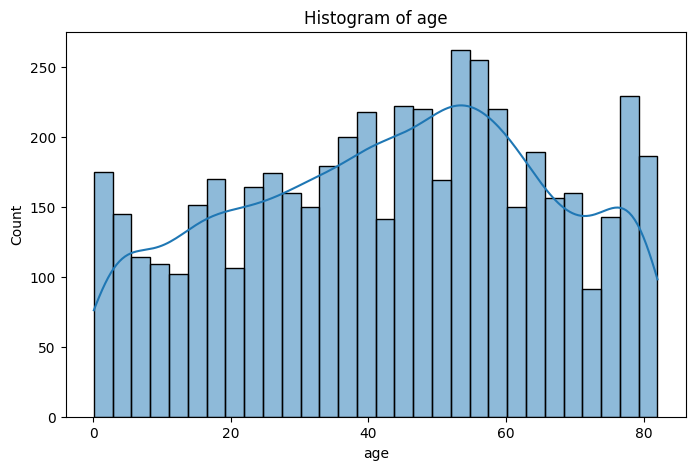

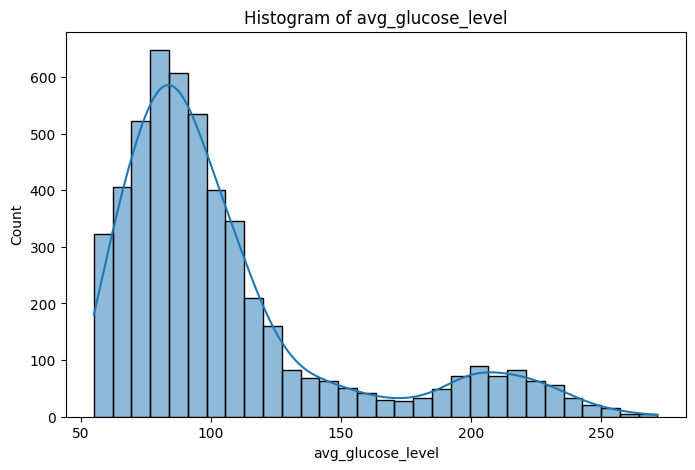

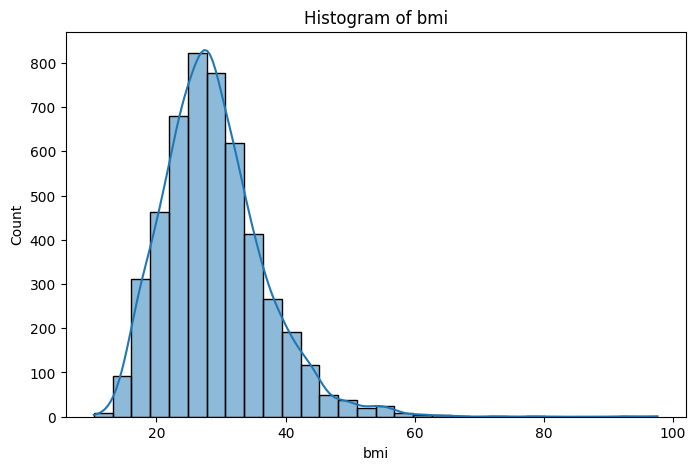

In [20]:
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.savefig(f'{col}_histogram.png')  # Saves screenshot
    plt.show()

## Boxplots grouped by stroke occurrence

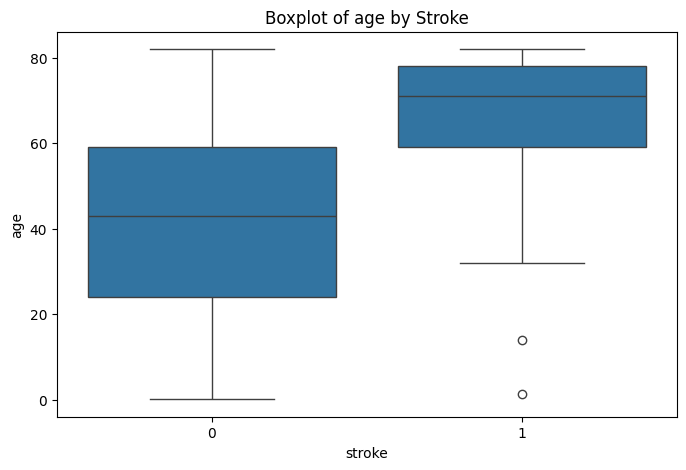

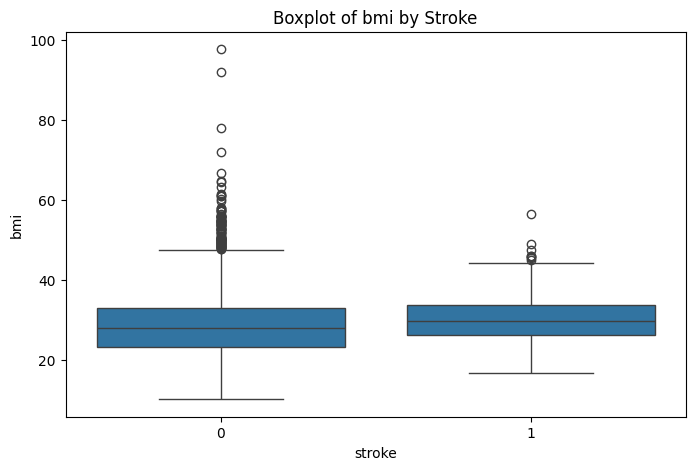

In [21]:
for col in ['age', 'bmi']:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f'Boxplot of {col} by Stroke')
    plt.savefig(f'{col}_boxplot.png')
    plt.show()

## Correlation heatmap

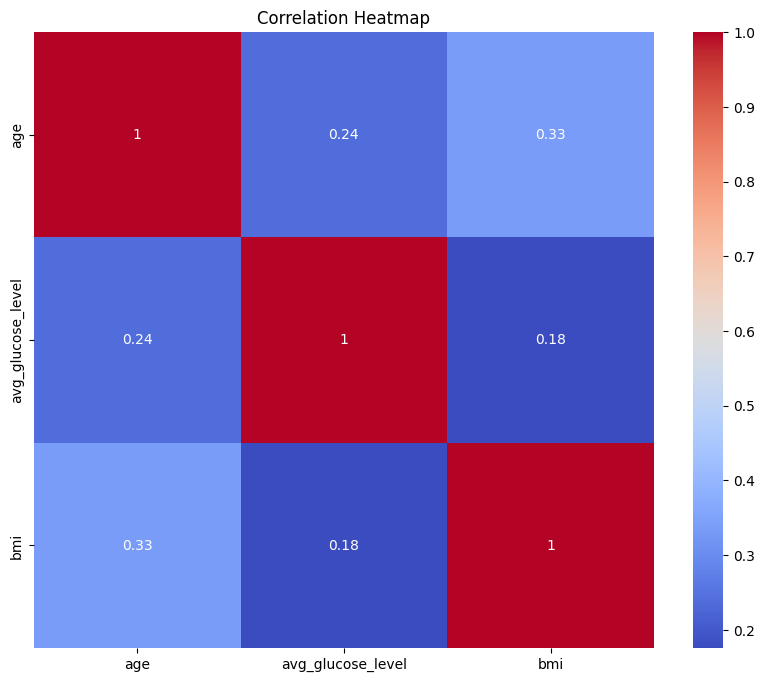

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

#Model Fitting

##Impute missing BMI values using the mean

In [23]:
df["bmi"] = df["bmi"].fillna(df["bmi"].mean())

##Define Features (X) and Target (Y)

In [24]:
# Features and target
features = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi"]
X = df[features]
y = df["stroke"]

##Train / validation / test split

In [25]:
# 60% train, 20% validation, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

print("Train size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:", X_test.shape[0])

Train size: 3066
Validation size: 1022
Test size: 1022


##Scale numeric features

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

##Fit logistic regression

In [27]:
log_reg = LogisticRegression(
    max_iter=1000,
    solver="lbfgs",
    class_weight="balanced"
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

##Evaluate and show coefficients

In [28]:
y_val_pred = log_reg.predict(X_val_scaled)

print("Confusion matrix (validation):")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification report (validation):")
print(classification_report(y_val, y_val_pred, digits=3))

print("\nIntercept:", log_reg.intercept_)
print("Coefficients:")
for name, coef in zip(features, log_reg.coef_[0]):
    print(f"{name}: {coef:.4f}")

Confusion matrix (validation):
[[716 256]
 [  7  43]]

Classification report (validation):
              precision    recall  f1-score   support

           0      0.990     0.737     0.845       972
           1      0.144     0.860     0.246        50

    accuracy                          0.743      1022
   macro avg      0.567     0.798     0.546      1022
weighted avg      0.949     0.743     0.816      1022


Intercept: [-1.17220196]
Coefficients:
age: 1.7110
hypertension: 0.1231
heart_disease: 0.0370
avg_glucose_level: 0.2446
bmi: 0.0266
